In [ ]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1z5EXpPHtwJnvN75Ifdt_AG93joJkL7zo
!gdown https://drive.google.com/uc?id=1A5Ly9UIusb5L_nR95QTgSYVwd9_g8qc-
!unzip /content/archive.zip
!rm -rf /content/archive.zip
!gdown https://drive.google.com/uc?id=1z_BVURk7ShW9G7DTzUMhy1x3vSzPkkxp
!mkdir sample
!mv /content/predict_score.py /content/sample/.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Data_path.csv')
df = df[df['source'] == 'SAVEE']
df.head()

,labels,source,path
0,male_neutral,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
1,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
2,male_neutral,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
3,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
4,male_neutral,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...


In [ ]:
df['labels'].value_counts()

male_neutral     120
male_angry        60
male_happy        60
male_sad          60
male_fear         60
male_disgust      60
male_surprise     60
Name: labels, dtype: int64

In [ ]:
df = df[df['labels'] != 'male_neutral']
df['labels'] = df['labels'].apply(lambda x:x.split('_')[1])
df.shape

(360, 3)

In [ ]:
df['labels'].value_counts()

angry       60
happy       60
sad         60
fear        60
disgust     60
surprise    60
Name: labels, dtype: int64

In [ ]:
import os
df['path'] = df['path'].apply(lambda x:os.path.split(x)[-1])
df.head()

,labels,source,path
1,angry,SAVEE,DC_a01.wav
3,angry,SAVEE,JK_a12.wav
5,happy,SAVEE,KL_h10.wav
7,sad,SAVEE,DC_sa05.wav
9,angry,SAVEE,JK_a09.wav


In [ ]:
l = os.listdir('/content/ALL')
for i in df['path'].values:
    if i not in l:
        print(i)

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.core.display import display

Sample for class = angry


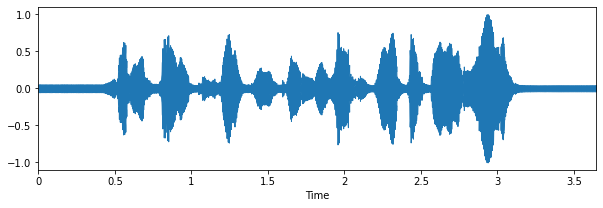

Sample for class = happy


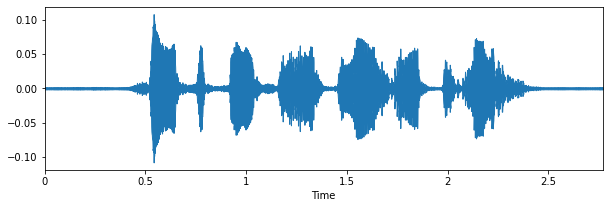

Sample for class = sad


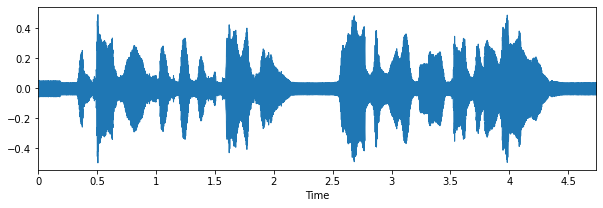

Sample for class = fear


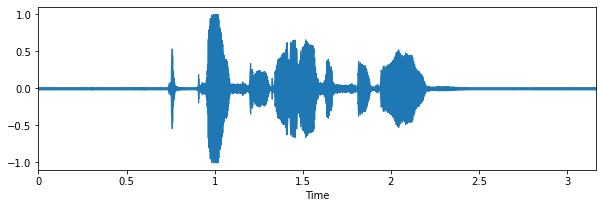

Sample for class = disgust


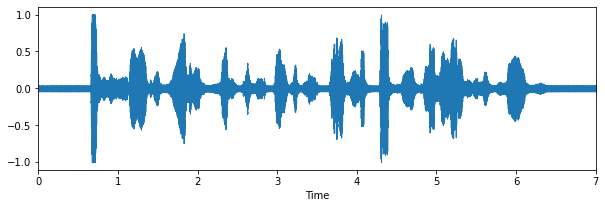

Sample for class = surprise


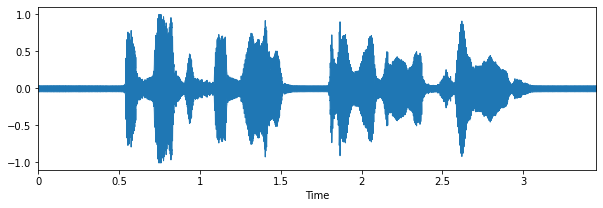

In [ ]:
for i in df.labels.unique():
    print(f'Sample for class = {i}')
    fname = '/content/ALL/' + df[df['labels'] == i]['path'].values[0]
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(10, 3))
    librosa.display.waveplot(data, sr=sampling_rate)
    plt.show()
    display(ipd.Audio(fname))
    print('=='*50)

In [ ]:
from tqdm.auto import tqdm

features = []
labels = []
for idx,row in tqdm(df.iterrows()):
    path = '/content/ALL/'+row['path']
    X, sample_rate = librosa.load(path,res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    features.append(mfccs.ravel())
    labels.append(row['labels'])

df = pd.DataFrame(data = features)
df['labels'] = labels
df = df.fillna(0.0)

0it [00:00, ?it/s]

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,labels
0,-11.113934,-7.215756,-6.219190,-5.926542,-5.850419,-4.808961,-2.513002,-3.500537,-3.721045,-4.487559,...,-5.023864,-5.254714,-5.234093,-5.310307,-5.621666,-6.072196,-6.611347,-2.509089,1.964607,angry
1,-5.234547,-6.687391,-16.406271,-17.042980,-16.232885,-14.091496,-13.224943,-10.678945,-9.309762,-5.470098,...,-26.350634,-25.106792,-23.058765,-23.787733,-23.516254,-24.285072,-23.437519,-22.714952,-23.930023,angry
2,-32.891754,-28.499279,-26.036020,-25.475706,-25.329830,-25.574585,-26.843117,-27.700157,-27.972561,-30.287527,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
3,-2.346513,-4.708540,-9.908001,-9.604337,-9.175134,-9.829355,-9.926719,-10.046446,-10.696879,-11.749737,...,-10.909529,-12.287182,-12.257010,-11.220351,-11.043715,-12.589155,-12.230991,-10.666862,-6.847251,sad
4,0.162413,-0.485495,0.270027,1.100219,3.304217,2.440548,-1.331775,-2.112403,-2.524601,-3.540464,...,-14.297167,-15.686988,-17.295773,-17.199368,-7.769609,-3.820099,-3.900290,-3.360698,-2.965190,angry


In [ ]:
df.shape

(360, 217)

In [ ]:
X = df.drop(columns = ['labels'])
y = df[['labels']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y,test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
X_train.shape,X_test.shape

((270, 216, 1), (90, 216, 1))

In [ ]:
y_train.shape,y_test.shape

((270, 1), (90, 1))

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import tensorflow as tf
import scikitplot as skplt
from sample import predict_score
from sklearn.metrics import classification_report,balanced_accuracy_score
print(tf.__version__)

2.11.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train['labels'].values)
y_test = encoder.transform(y_test['labels'].values)
encoder.classes_

array(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'],
      dtype=object)

In [ ]:
i = tf.keras.layers.Input(shape = (X_train.shape[1],1))
x = tf.keras.layers.Conv1D(16, (3), strides=(1), padding='same', activation = tf.nn.relu, name='conv2d_1') (i)
x = tf.keras.layers.MaxPooling1D((2), strides=None, padding="valid", name='maxpool2d_1') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_1') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_1') (x)


x = tf.keras.layers.Conv1D(32, (3), strides=(1), padding='same', activation = tf.nn.relu, name='conv2d_2') (x)
x = tf.keras.layers.MaxPooling1D((2), strides=None, padding="valid", name='maxpool2d_2') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_2') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_2') (x)


# x = tf.keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_3') (x)
# x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_3') (x) #AveragePooling2D
# # x = tf.keras.layers.Dropout(0.4, name='dropout_3') (x)
# x = tf.keras.layers.BatchNormalization(name='Batchnorm_3') (x)


x = tf.keras.layers.Conv1D(128, (3), strides=(1), padding='same', activation = tf.nn.relu, name='conv2d_4') (x)
x = tf.keras.layers.MaxPooling1D((2), strides=None, padding="valid", name='maxpool2d_4') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_4') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_4') (x)


# x = tf.keras.layers.GlobalMaxPooling2D(name='G_maxpool2d') (x)
x = tf.keras.layers.Flatten(name='flatten') (x)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='dense_1') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_1') (x)

x = tf.keras.layers.Dense(256, activation=tf.nn.relu, name='dense_2') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_2') (x)

x = tf.keras.layers.Dense(6, activation = tf.nn.softmax, name='output_layer') (x)

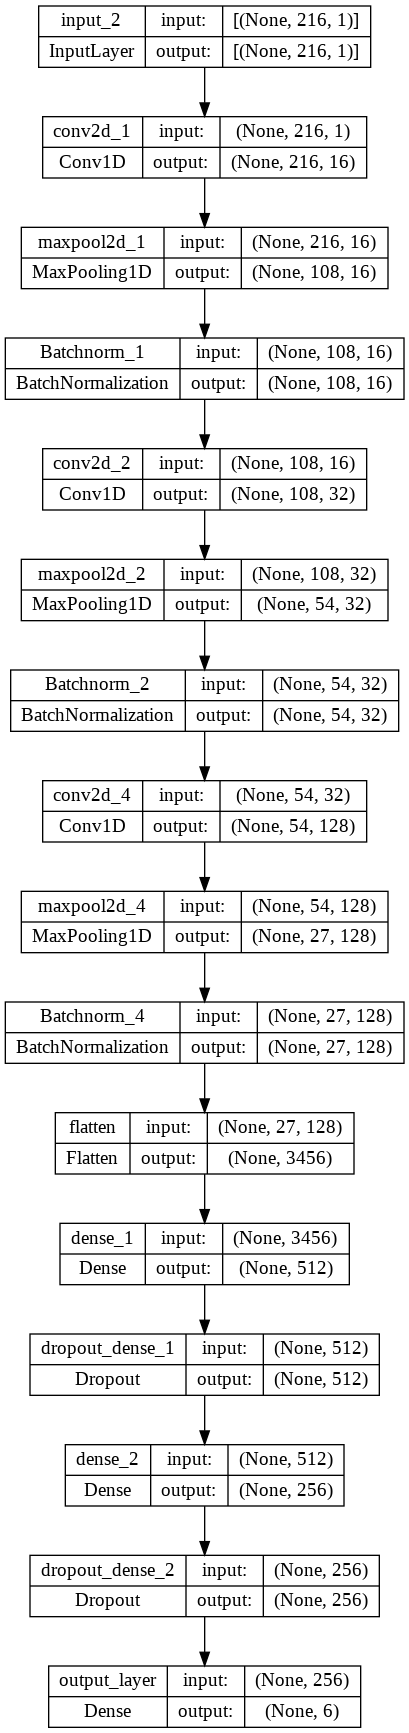

In [ ]:
model = tf.keras.models.Model(inputs = i, outputs = x)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 216, 1)]          0         
                                                                 
 conv2d_1 (Conv1D)           (None, 216, 16)           64        
                                                                 
 maxpool2d_1 (MaxPooling1D)  (None, 108, 16)           0         
                                                                 
 Batchnorm_1 (BatchNormaliza  (None, 108, 16)          64        
 tion)                                                           
                                                                 
 conv2d_2 (Conv1D)           (None, 108, 32)           1568      
                                                                 
 maxpool2d_2 (MaxPooling1D)  (None, 54, 32)            0         
                                                           

In [ ]:
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def balanced_accuracy(y_true, y_pred):
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_pred = np.argmax(y_pred,axis=-1)

    y_true = y_true.ravel().astype('int32')
    y_pred = y_pred.ravel().astype('int32')
    return balanced_accuracy_score(y_true,y_pred)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.sparse_categorical_crossentropy, #binary_crossentropy
              metrics = predict_score.accuracy, run_eagerly=True)

In [ ]:
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
validation_batch_size = 32
validation_steps = len(X_test) // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
import time
print('Results for CNN Classifier:-\n')
start_time = time.time()

result1 = model.fit(X_train, y_train, 
                   validation_data = (X_test, y_test), 
                   callbacks=[callback],
                   epochs = 2,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for LSTM Classifier:-

Epoch 1/2
8/8 [==============================] - 1s 161ms/step - loss: 3.6248 - balanced_accuracy: 0.1929 - val_loss: 1.7798 - val_balanced_accuracy: 0.1601
Epoch 2/2
8/8 [==============================] - 2s 307ms/step - loss: 2.5147 - balanced_accuracy: 0.4066 - val_loss: 1.7786 - val_balanced_accuracy: 0.1845

Training time(sec) =  3.645408868789673


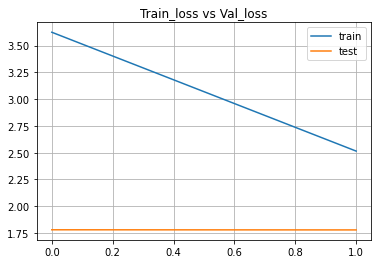

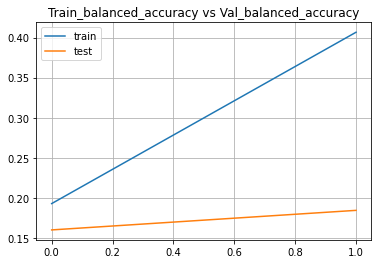

In [ ]:
plt.title('Loss')
plt.plot(result1.history['loss'], label='train')
plt.plot(result1.history['val_loss'], label='test')
plt.title('Train_loss vs Val_loss')
plt.grid()
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(result1.history['balanced_accuracy'], label='train')
plt.plot(result1.history['val_balanced_accuracy'], label='test')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.grid()
plt.legend()
plt.show();

3/3 [==============================] - 0s 57ms/step
Prediction time(sec) =  0.4137301445007324


Training score =  0.32592592592592595
Tesing score =  0.20000000000000004


No of missclassified for class angry (test data) = 9 
No of missclassified for class disgust (test data) = 15 
No of missclassified for class fear (test data) = 15 
No of missclassified for class happy (test data) = 11 
No of missclassified for class sad (test data) = 7 
No of missclassified for class surprise (test data) = 15 
Total no of missclassified points(test data) =  72
Total % of missclassified points(test data) =  0.8


Confusion matrix:


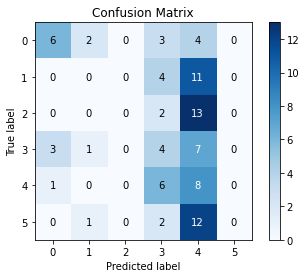



Classification report:-

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        15
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        15
           3       0.19      0.27      0.22        15
           4       0.15      0.53      0.23        15
           5       0.00      0.00      0.00        15

    accuracy                           0.20        90
   macro avg       0.16      0.20      0.16        90
weighted avg       0.16      0.20      0.16        90

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

y_pred1 = np.argmax(model.predict(X_train),axis=1).ravel()
start_time = time.time()
y_pred = np.argmax(model.predict(X_test),axis=1).ravel()
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score.predict_score(y_pred1,y_train,0.8)
y_pred = predict_score.predict_score(y_pred,y_test,0.8)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = np.unique(y_test_copy.values.ravel())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

CNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

In [ ]:
X_train = X_train_copy.copy()
X_test = X_test_copy.copy()
y_train = y_train_copy.copy()
y_test = y_test_copy.copy()

In [ ]:
X_train.shape,X_test.shape

((270, 216), (90, 216))

In [ ]:
y_train.shape,y_test.shape

((270, 1), (90, 1))

In [ ]:
label = np.unique(y_train)
label

array(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'],
      dtype=object)

Results for Logistic regression:-

********************************************************************************

Training time(sec) =  2.2158358097076416
Prediction time(sec) =  0.0006585121154785156


********************************************************************************

Training score =  0.9111111111111111
Tesing score =  0.18888888888888888


********************************************************************************


No of missclassified for class angry (test data) = 13 
No of missclassified for class disgust (test data) = 12 
No of missclassified for class fear (test data) = 13 
No of missclassified for class happy (test data) = 13 
No of missclassified for class sad (test data) = 11 
No of missclassified for class surprise (test data) = 11 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  73
Total % of missclassified points (test data) =  81.11111111111111


************************************

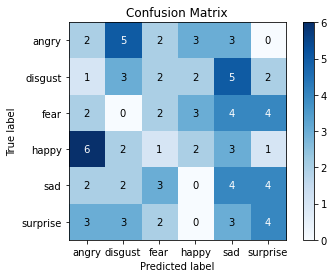



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       angry       0.12      0.13      0.13        15
     disgust       0.20      0.20      0.20        15
        fear       0.17      0.13      0.15        15
       happy       0.20      0.13      0.16        15
         sad       0.18      0.27      0.22        15
    surprise       0.27      0.27      0.27        15

    accuracy                           0.19        90
   macro avg       0.19      0.19      0.19        90
weighted avg       0.19      0.19      0.19        90



********************************************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, 
                        penalty='l2',           #or 'l1','elasticnet','none'
                        solver='lbfgs',         #or 'newton-cg'
                        multi_class='auto',     #or 'ovr','multinomial'
                        l1_ratio=None,          #or 0 <= l1_ratio <= 1 but only used if penalty='elasticnet'
                        class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lr_miss)
print('Total % of missclassified points (test data) = ',(lr_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

LR = [acc1_lr, acc2_lr, lr_miss, lr_miss/len(y_test), lr_time, lr_time2]

In [ ]:
encoder.classes_

array(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'],
      dtype=object)

Results for Gaussian naive bayes classifier:-

********************************************************************************

Training time(sec) =  0.0038526058197021484
Prediction time(sec) =  0.0015444755554199219


********************************************************************************

Training score =  0.35555555555555557
Tesing score =  0.26666666666666666


********************************************************************************


No of missclassified for class angry (test data) = 6 
No of missclassified for class disgust (test data) = 9 
No of missclassified for class fear (test data) = 13 
No of missclassified for class happy (test data) = 13 
No of missclassified for class sad (test data) = 10 
No of missclassified for class surprise (test data) = 15 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  66
Total % of missclassified points (test data) =  73.33333333333333


**********************

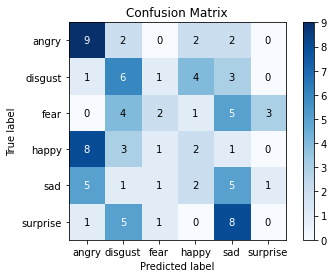



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       angry       0.38      0.60      0.46        15
     disgust       0.29      0.40      0.33        15
        fear       0.33      0.13      0.19        15
       happy       0.18      0.13      0.15        15
         sad       0.21      0.33      0.26        15
    surprise       0.00      0.00      0.00        15

    accuracy                           0.27        90
   macro avg       0.23      0.27      0.23        90
weighted avg       0.23      0.27      0.23        90



********************************************************************************


In [ ]:
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB(priors=[1/len(encoder.classes_)]*len(encoder.classes_))

print('Results for Gaussian naive bayes classifier:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)

cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',mnb_miss)
print('Total % of missclassified points (test data) = ',(mnb_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

MNB = [acc1_mnb, acc2_mnb, mnb_miss, mnb_miss/len(y_test), mnb_time, mnb_time2]

In [ ]:
s1=[CNN,LR,MNB]
s2=['CNN','LR','GNB']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,CNN,0.325926,0.200000,72,80.000000,3.645409,0.413730
1,LR,0.911111,0.188889,73,81.111111,2.215836,0.000659
2,GNB,0.355556,0.266667,66,73.333333,0.003853,0.001544


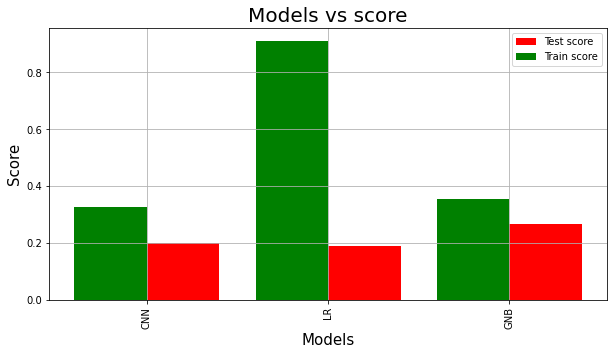

In [ ]:
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Test score'], color ='red',width = 0.4)
plt.bar(x-0.2, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Test score','Train score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

In [ ]:
!rm -rf /content/data

In [ ]:
import os
import joblib
os.mkdir('/content/data')
joblib.dump(encoder, "/content/data/encoder.joblib")
joblib.dump(scaler, "/content/data/scaler.joblib")

os.mkdir('data/model')
model.save('/content/data/model/')

In [ ]:
!zip -r model.zip /content/data/

updating: content/data/ (stored 0%)
updating: content/data/encoder.joblib (deflated 28%)
updating: content/data/model/ (stored 0%)
updating: content/data/model/variables/ (stored 0%)
updating: content/data/model/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/data/model/variables/variables.index (deflated 70%)
updating: content/data/model/saved_model.pb (deflated 89%)
updating: content/data/model/assets/ (stored 0%)
updating: content/data/model/keras_metadata.pb (deflated 93%)
  adding: content/data/scaler.joblib (deflated 9%)


**Prediction**

In [ ]:
import joblib 
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

model_path = '/content/data/model'
scaler_path = '/content/data/scaler.joblib'
encoder_path = '/content/data/encoder.joblib'

def balanced_accuracy(y_true, y_pred):
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_pred = np.argmax(y_pred,axis=-1)

    y_true = y_true.ravel().astype('int32')
    y_pred = y_pred.ravel().astype('int32')
    return balanced_accuracy_score(y_true,y_pred)

model = tf.keras.models.load_model(model_path,custom_objects = {'balanced_accuracy' : balanced_accuracy})
scaler = joblib.load(scaler_path)
encoder = joblib.load(encoder_path)

In [ ]:
import librosa
import numpy as np
def predict_class(path):
    X, sample_rate = librosa.load(path,res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    arr = scaler.transform([mfccs.ravel()])
    arr[np.isnan(arr)] = 0.0
    pred = model.predict(arr)
    pred = np.argmax(pred,axis=1)
    pred = encoder.inverse_transform(pred)

    return pred[0]

In [ ]:
import numpy as np
from google.colab import files
import IPython.display as ipd
from IPython.core.display import display

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
    path = fn
    cls = predict_class(path)

    print('\n\n')
    display(ipd.Audio(fname))
    print('Predicted Class : ',cls)

Saving DC_a01.wav to DC_a01.wav
1/1 [==============================] - 0s 30ms/step





Predicted Class :  disgust
